In [4]:
import torch
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from argparse import Namespace
# from model import MLP
from model2 import MLP
from torch import nn
from dataloader import load_data
from tqdm import tqdm


train_inputs,train_lables,test_inputs,test_lables=load_data(60000,60000,device=torch.device('cuda:5'))




load data set
create loader
construct data


100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


epoch0 loss:4.116562366485596
epoch0 acc:0.1232
epoch1 loss:2.733952760696411
epoch1 acc:0.1358
epoch2 loss:2.527592897415161
epoch2 acc:0.1444
epoch3 loss:2.4429023265838623
epoch3 acc:0.1525
epoch4 loss:2.391840696334839
epoch4 acc:0.1632
epoch5 loss:2.354097843170166
epoch5 acc:0.1762
epoch6 loss:2.3227531909942627
epoch6 acc:0.1859
epoch7 loss:2.294666051864624
epoch7 acc:0.2029
epoch8 loss:2.2681849002838135
epoch8 acc:0.221
epoch9 loss:2.2428627014160156
epoch9 acc:0.2364
epoch10 loss:2.2189838886260986
epoch10 acc:0.2509
epoch11 loss:2.196943998336792
epoch11 acc:0.2621
epoch12 loss:2.1767799854278564
epoch12 acc:0.2713
epoch13 loss:2.158188581466675
epoch13 acc:0.2802
epoch14 loss:2.140874147415161
epoch14 acc:0.2847
epoch15 loss:2.1246492862701416
epoch15 acc:0.2913
epoch16 loss:2.109323501586914
epoch16 acc:0.2971
epoch17 loss:2.094771146774292
epoch17 acc:0.3008
epoch18 loss:2.0809245109558105
epoch18 acc:0.305
epoch19 loss:2.0675957202911377
epoch19 acc:0.3076
epoch20 loss:

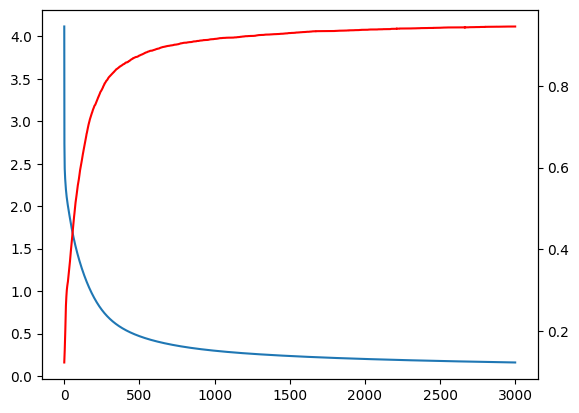

In [8]:
from matplotlib import pyplot as plt
param=Namespace(
    lr            = 1e-3,
    epoch         = 3000,  
)

def acc(model):
    model.eval()
    correct=0
    total=0
    with torch.no_grad():
        
        for i in range(len(test_inputs)):
            outputs=model(test_inputs[i])
            _,predicted=torch.max(outputs.data,1)
            total+=len(predicted)
            correct+=(predicted==test_lables[i]).sum().item()
    model.train()
    return correct/total

mlp = MLP()
mlp.train()

device = torch.device('cuda:5')
mlp.to(device,non_blocking=True)
optimizer = torch.optim.SGD(mlp.parameters(), lr=param.lr)
loss_function = nn.CrossEntropyLoss()

loss_list=[]
acc_list=[]

for epoch in range(param.epoch):
    ls=0
    for i in range(len(train_inputs)): 
        inputi  = train_inputs[i]
        label  = train_lables[i]
        output = mlp(inputi)
        loss   = loss_function(output,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ls+=loss
        
    print(f"epoch{epoch} loss:{loss}")
    
    acci=acc(mlp)
    print(f"epoch{epoch} acc:{acci}")
    acc_list.append(acci)
    loss_list.append(ls)


y1=plt.subplot()
loss_list=[i.cpu().detach().numpy() for i in loss_list]

y1.plot(range(param.epoch),loss_list,label='loss')

y2=y1.twinx()
y2.plot(range(param.epoch),acc_list,label='acc',color='r')

plt.show()
torch.save(mlp,'./mlp2.pth')